In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Test

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
# Hilfsklasse Path zum Laden der Dateien
path = Path("data")

In [5]:
df = pd.read_csv(path/'metadata.csv')
df = df[['name','meta.clinical.benign_malignant']]
df = df.loc[(df['meta.clinical.benign_malignant'] != 'indeterminate') & (df['meta.clinical.benign_malignant'] != 'indeterminate/malignant')]

In [6]:
frac = 1
df = df.sample(frac = frac) 

In [7]:
default_acc = round(len(df[df['meta.clinical.benign_malignant'] == 'benign'])/len(df)*100,1)
default_acc

72.9

In [11]:
np.random.seed(42)
bs = 16
#bs = 64
data = ImageDataBunch.from_df(path, df=df, ds_tfms=get_transforms(), suffix='.jpg', size=500, bs=bs).normalize(imagenet_stats)

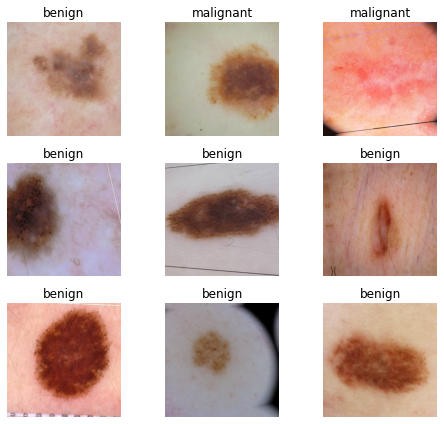

In [63]:
data.show_batch(rows=3, figsize=(7,6))

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [15]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.264216,0.769418,0.369748,00:21
1,1.116244,1.020461,0.394958,00:20
2,1.002789,0.845706,0.285714,00:20
3,0.887036,0.772003,0.294118,00:21
4,0.738096,0.730310,0.285714,00:20
5,0.649435,0.699729,0.277311,00:20
6,0.559527,0.698954,0.243697,00:20
7,0.497084,0.689389,0.252101,00:21
8,0.456781,0.698009,0.285714,00:20
9,0.446830,0.695082,0.285714,00:20


In [9]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [10]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.309374,1.161280,0.378151,00:51
1,1.257482,0.968561,0.285714,00:39
2,1.040884,1.172719,0.352941,00:39
3,0.870439,1.003283,0.344538,00:39
4,0.694046,0.750588,0.277311,00:38
5,0.596950,0.703577,0.285714,00:38
6,0.539200,0.757288,0.252101,00:38
7,0.484418,0.709984,0.294118,00:38
8,0.439347,0.697207,0.319328,00:39
9,0.373332,0.676528,0.277311,00:39


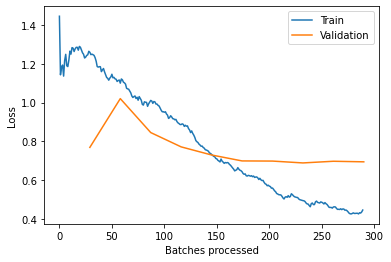

In [16]:
learn.recorder.plot_losses()

In [25]:
learn.save('stage-1')

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

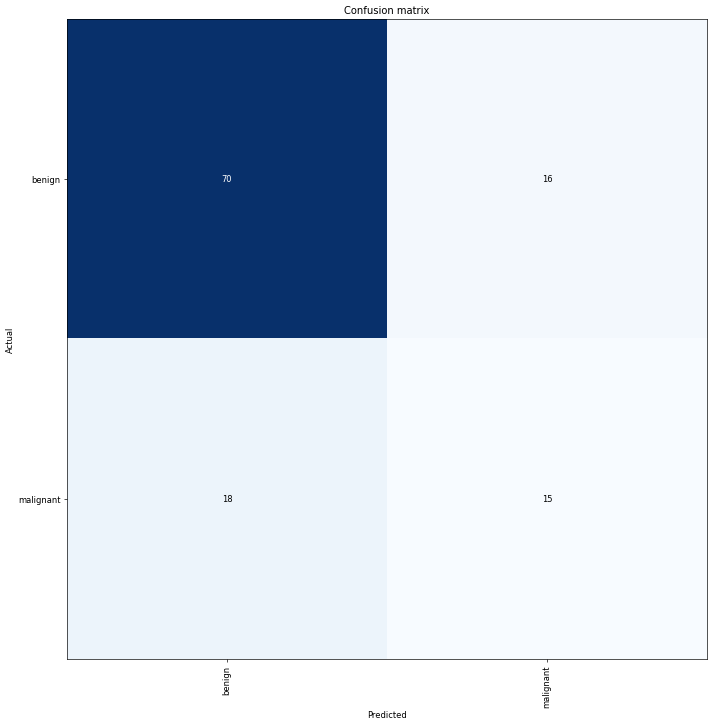

In [52]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


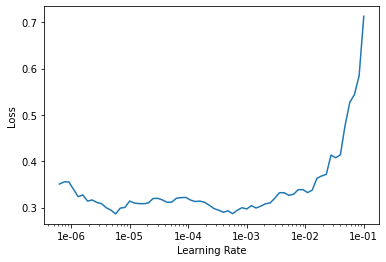

In [30]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()